In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("##################### Shape #####################")
print(df.shape)

##################### Shape #####################
(768, 9)


In [ ]:
print("##################### Types #####################")
print(df.dtypes)

##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
print("##################### NA #####################")
print(df.isnull().sum())

##################### NA #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print("##################### Quantiles #####################")
print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)  # sayısal değişkenlerin dağılım bilgisi

##################### Quantiles #####################
                            0.00      0.05      0.50       0.95       0.99  \
Pregnancies                0.000   0.00000    3.0000   10.00000   13.00000   
Glucose                    0.000  79.00000  117.0000  181.00000  196.00000   
BloodPressure              0.000  38.70000   72.0000   90.00000  106.00000   
SkinThickness              0.000   0.00000   23.0000   44.00000   51.33000   
Insulin                    0.000   0.00000   30.5000  293.00000  519.90000   
BMI                        0.000  21.80000   32.0000   44.39500   50.75900   
DiabetesPedigreeFunction   0.078   0.14035    0.3725    1.13285    1.69833   
Age                       21.000  21.00000   29.0000   58.00000   67.00000   
Outcome                    0.000   0.00000    0.0000    1.00000    1.00000   

                            1.00  
Pregnancies                17.00  
Glucose                   199.00  
BloodPressure             122.00  
SkinThickness            

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    This function identifies and categorizes columns in a pandas DataFrame based on their data types and number of unique values.

    Args:
        dataframe (pandas.DataFrame): The input DataFrame.
        cat_th (int, optional): The threshold for considering a column categorical based on the number of unique values. Defaults to 10.
        car_th (int, optional): The threshold for considering a categorical column with many unique values as cardinal. Defaults to 20.

    Returns:
        tuple: A tuple containing three lists:
            - cat_cols (list): List of column names identified as categorical.
            - num_cols (list): List of column names identified as numerical.
            - cat_but_car (list): List of column names initially identified as categorical but considered cardinal due to exceeding the car_th threshold.
    """

    # Step 1: Identify initial categorical columns (object type)
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    print(f"# Initial Categorical Columns (object type): {len(cat_cols)}")

    # Step 2: Identify numerical-looking categorical columns (low unique values, not object type)
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                    dataframe[col].dtypes != "O"]
    print(f"# Categorical-looking Numerical Columns (< {cat_th} unique values, not object type): {len(num_but_cat)}")

    # Step 3: Identify and remove cardinal columns (high unique values, object type) from initial categorical list
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat  # Combine initial and numerical-looking categorical
    cat_cols = [col for col in cat_cols if col not in cat_but_car]  # Remove cardinal columns
    print(f"# Cardinal Columns (> {car_th} unique values, object type): {len(cat_but_car)}")

    # Step 4: Identify final numerical columns (not object type, excluding previously identified)
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]  # Remove numerical-looking categorical
    print(f"# Final Numerical Columns (not object type, excluding identified categorical): {len(num_cols)}")

    # Step 5: Report summary of column categories
    print(f"\nObservations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')  # the number of categorical variables
    print(f'num_cols: {len(num_cols)}')  # the number of numerical variables
    print(f'cat_but_car: {len(cat_but_car)}')  # the number of cardinal variables
    print(f'num_but_cat: {len(num_but_cat)}')  # the number of categorical variables that look numerical

    return cat_cols, num_cols, cat_but_car


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# Initial Categorical Columns (object type): 0
# Categorical-looking Numerical Columns (< 10 unique values, not object type): 1
# Cardinal Columns (> 20 unique values, object type): 0
# Final Numerical Columns (not object type, excluding identified categorical): 8

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [ ]:
print("Categorical columns:",cat_cols)
print("Numerical columns:", num_cols)
print("Cardinal columns:", cat_but_car)

Categorical columns: ['Outcome']
Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Cardinal columns: []


In [ ]:
# Target variable analysis
# The average of the numerical variables according to the target variable
df.groupby(cat_cols)[num_cols].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# The average of the target variable according to the categorical variables
df[cat_cols].mean()

,0
Outcome,0.348958


In [ ]:
print(df.Outcome.value_counts())
print("-------------------------------")
print(df[cat_cols].mean())
print("-------------------------------")
print("Ratio: ")
(df.Outcome.value_counts() / len(df)) *100

Outcome
0    500
1    268
Name: count, dtype: int64
-------------------------------
Outcome    0.348958
dtype: float64
-------------------------------
Ratio: 


,count
Outcome,
0,65.104167
1,34.895833


In [ ]:
(df.Outcome.value_counts() / len(df))*100

,count
Outcome,
0,65.104167
1,34.895833


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


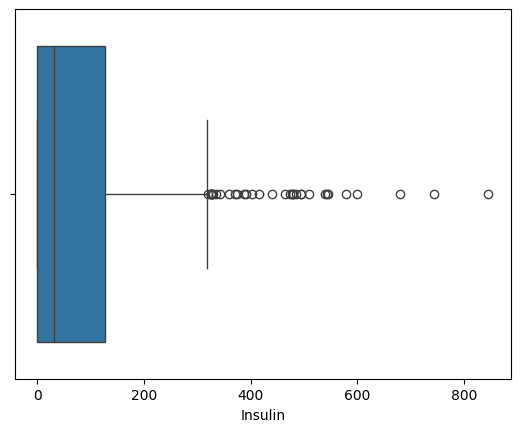

In [ ]:
# Boxplot
sns.boxplot(x=df["Insulin"])
plt.show()

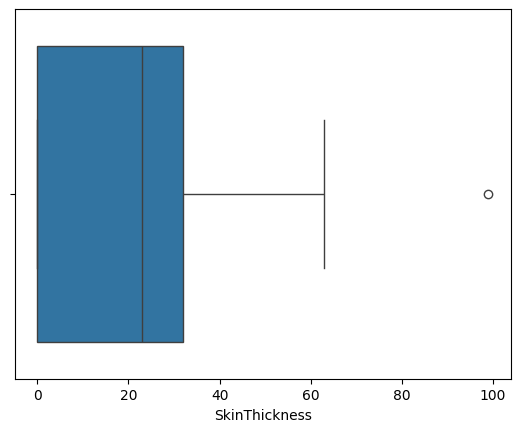

In [ ]:
sns.boxplot(x=df["SkinThickness"])
plt.show()

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
for i in df.columns:
    print("Thresholds of {} : ({:.2f}, {:.2f})".format(i, *outlier_thresholds(df,i)))

Thresholds of Pregnancies : (-6.50, 13.50)
Thresholds of Glucose : (37.12, 202.12)
Thresholds of BloodPressure : (35.00, 107.00)
Thresholds of SkinThickness : (-48.00, 80.00)
Thresholds of Insulin : (-190.88, 318.12)
Thresholds of BMI : (13.35, 50.55)
Thresholds of DiabetesPedigreeFunction : (-0.33, 1.20)
Thresholds of Age : (-1.50, 66.50)
Thresholds of Outcome : (-1.50, 2.50)


In [ ]:
# Observe the outliers, it can be functioned as well, but we don't need here
low, up = outlier_thresholds(df, "Pregnancies")
df[((df["Pregnancies"] < low) | (df["Pregnancies"] > up))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Check for zero values in 'Insulin' and 'Glucose' columns
conditions = [df['Insulin'] == 0, df['Glucose'] == 0]
results = ['Yes', 'No']

# Create a new column to show if there are zero values
df['Has Zero Value'] = np.select(conditions, results, default='NA')

# Print the DataFrame showing if there are zero values
print(df[['Insulin', 'Glucose', 'Has Zero Value']])

     Insulin  Glucose Has Zero Value
0          0      148            Yes
1          0       85            Yes
2          0      183            Yes
3         94       89             NA
4        168      137             NA
..       ...      ...            ...
763      180      101             NA
764        0      122            Yes
765      112      121             NA
766        0      126            Yes
767        0       93            Yes

[768 rows x 3 columns]


In [ ]:
# Count number of zero values in 'Insulin' and 'Glucose' columns
num_zero_insulin = df['Insulin'].eq(0).sum()
num_zero_glucose = df['Glucose'].eq(0).sum()

# Print the results
print(f"Number of zero values in 'Insulin' column: {num_zero_insulin}")
print(f"Number of zero values in 'Glucose' column: {num_zero_glucose}")

Number of zero values in 'Insulin' column: 374
Number of zero values in 'Glucose' column: 5


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Zero Value
0,6,148,72,35,0,33.6,0.627,50,1,Yes
1,1,85,66,29,0,26.6,0.351,31,0,Yes
2,8,183,64,0,0,23.3,0.672,32,1,Yes
3,1,89,66,23,94,28.1,0.167,21,0,NA
4,0,137,40,35,168,43.1,2.288,33,1,NA
5,5,116,74,0,0,25.6,0.201,30,0,Yes
6,3,78,50,32,88,31.0,0.248,26,1,NA
7,10,115,0,0,0,35.3,0.134,29,0,Yes
8,2,197,70,45,543,30.5,0.158,53,1,NA
9,8,125,96,0,0,0.0,0.232,54,1,Yes


In [ ]:
num_cols_miss = [i for i in num_cols if i != "Pregnancies"]
for i in num_cols_miss:
    df[i] = df.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Zero Value
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Yes
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,NA
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,NA
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,Yes
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,NA
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,Yes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,NA
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,Yes


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0
Has Zero Value,0


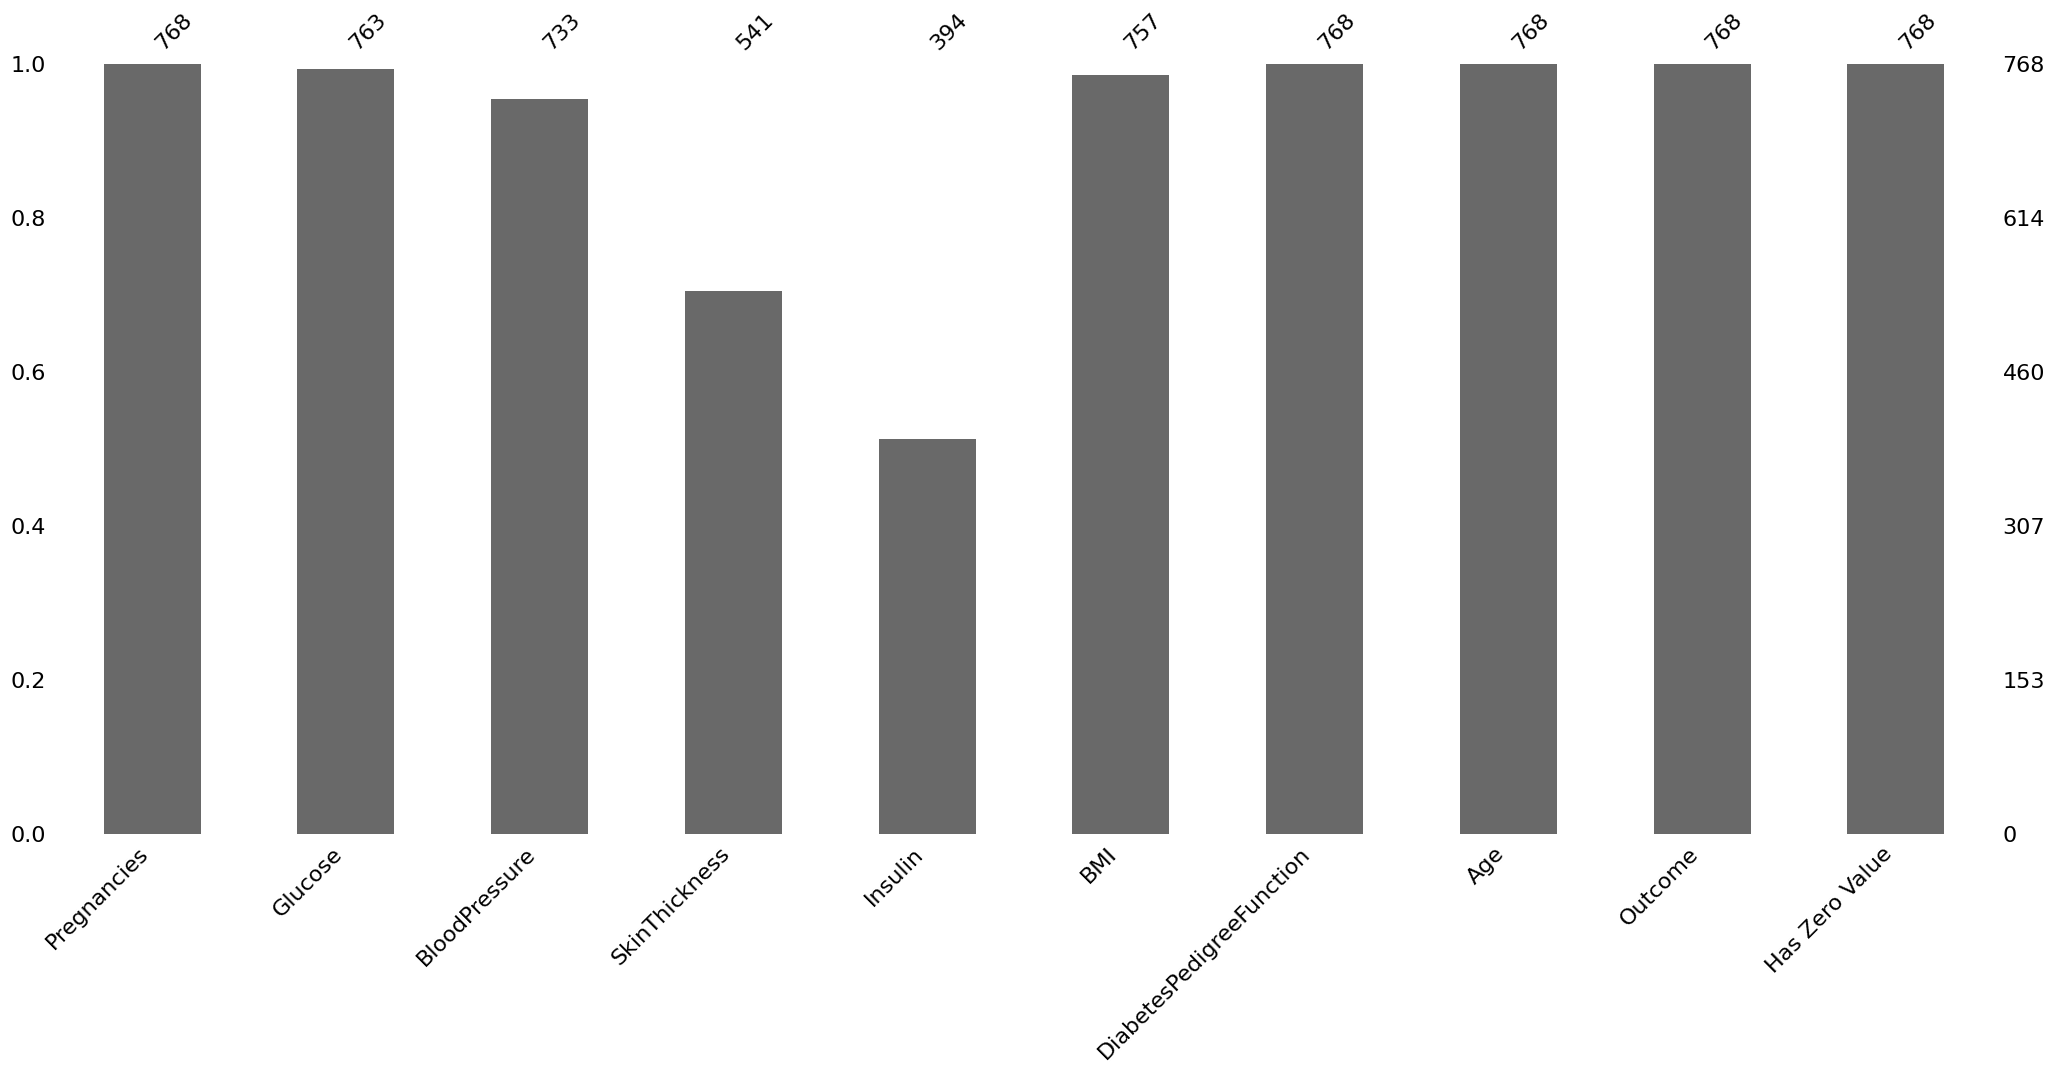

In [ ]:
# the number of non-missing data
msno.bar(df)
plt.show()

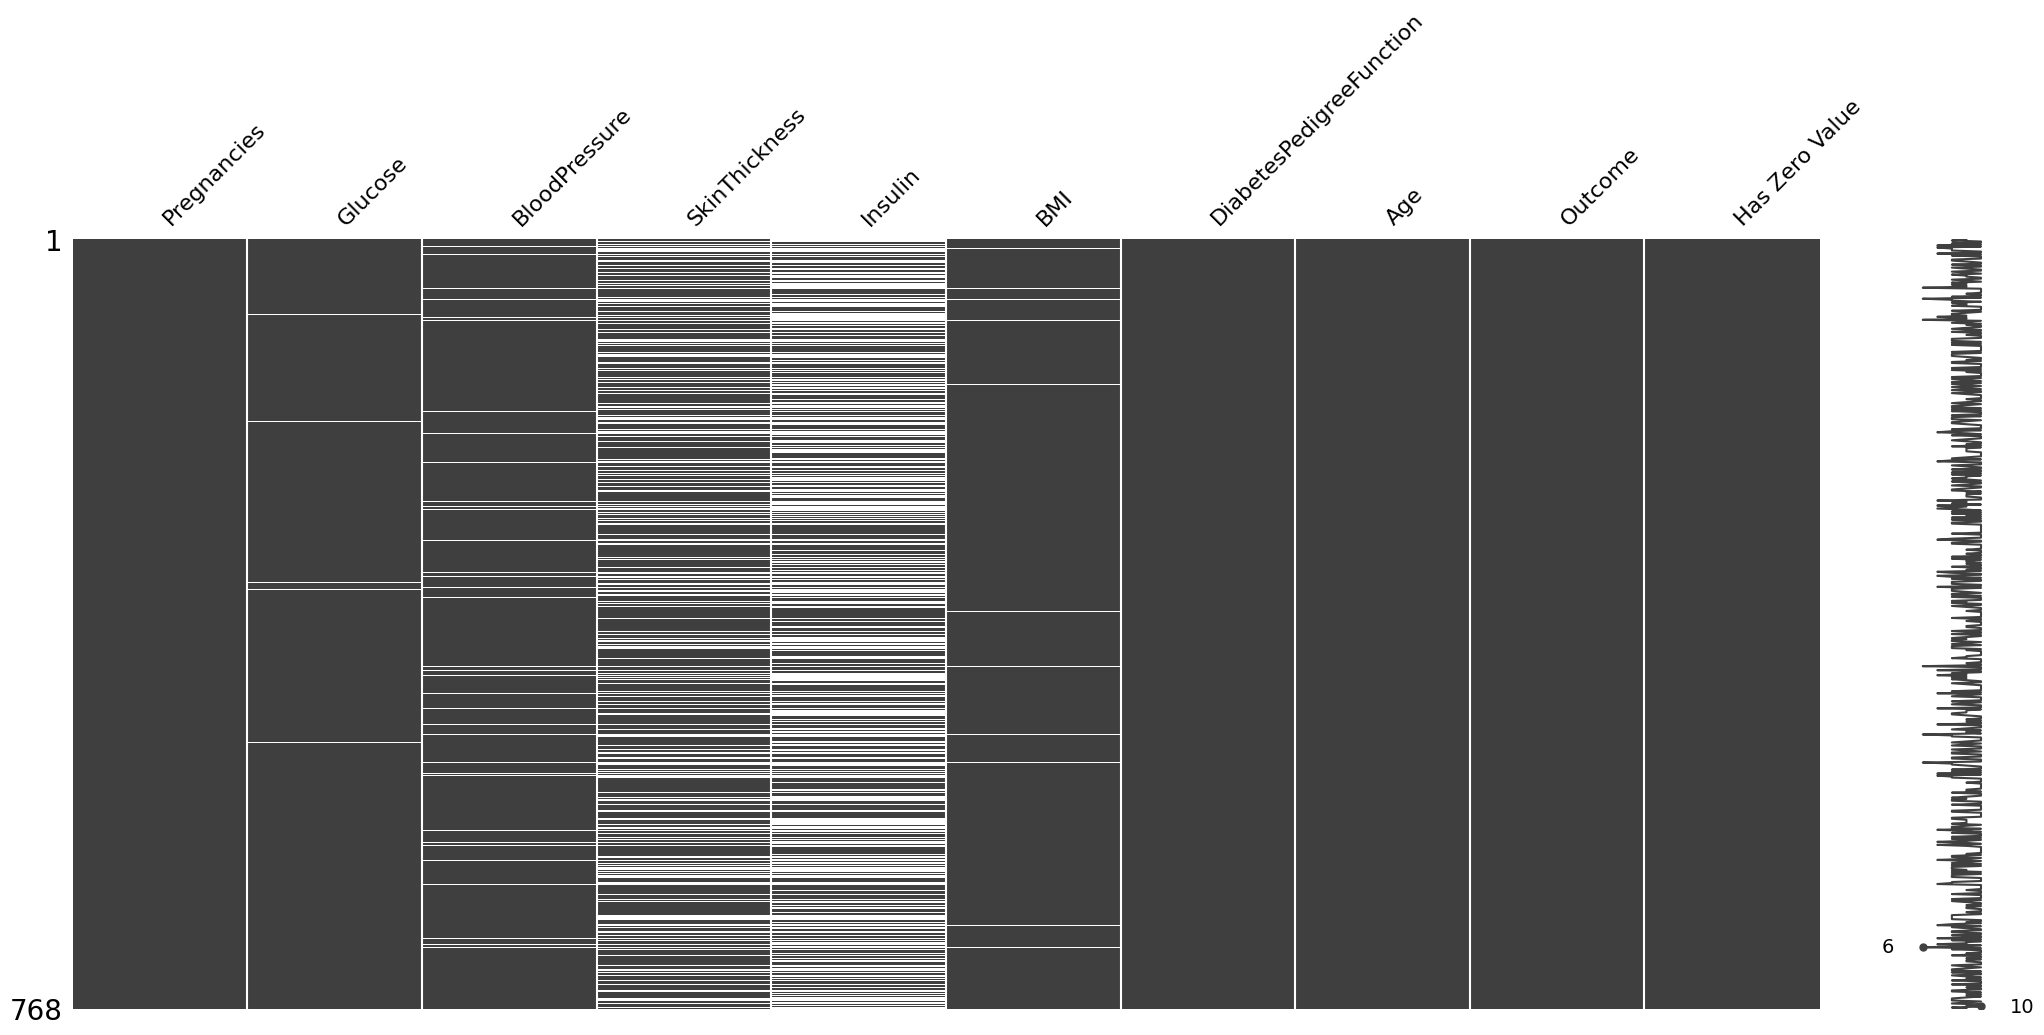

In [ ]:
"""
y-axis = indexes
x-axis = variables
black = non-missing index
white = missing(NaN) index
In some datasets, relativeness of missing datas on variables can be observed according to whites
"""
msno.matrix(df)
plt.show()

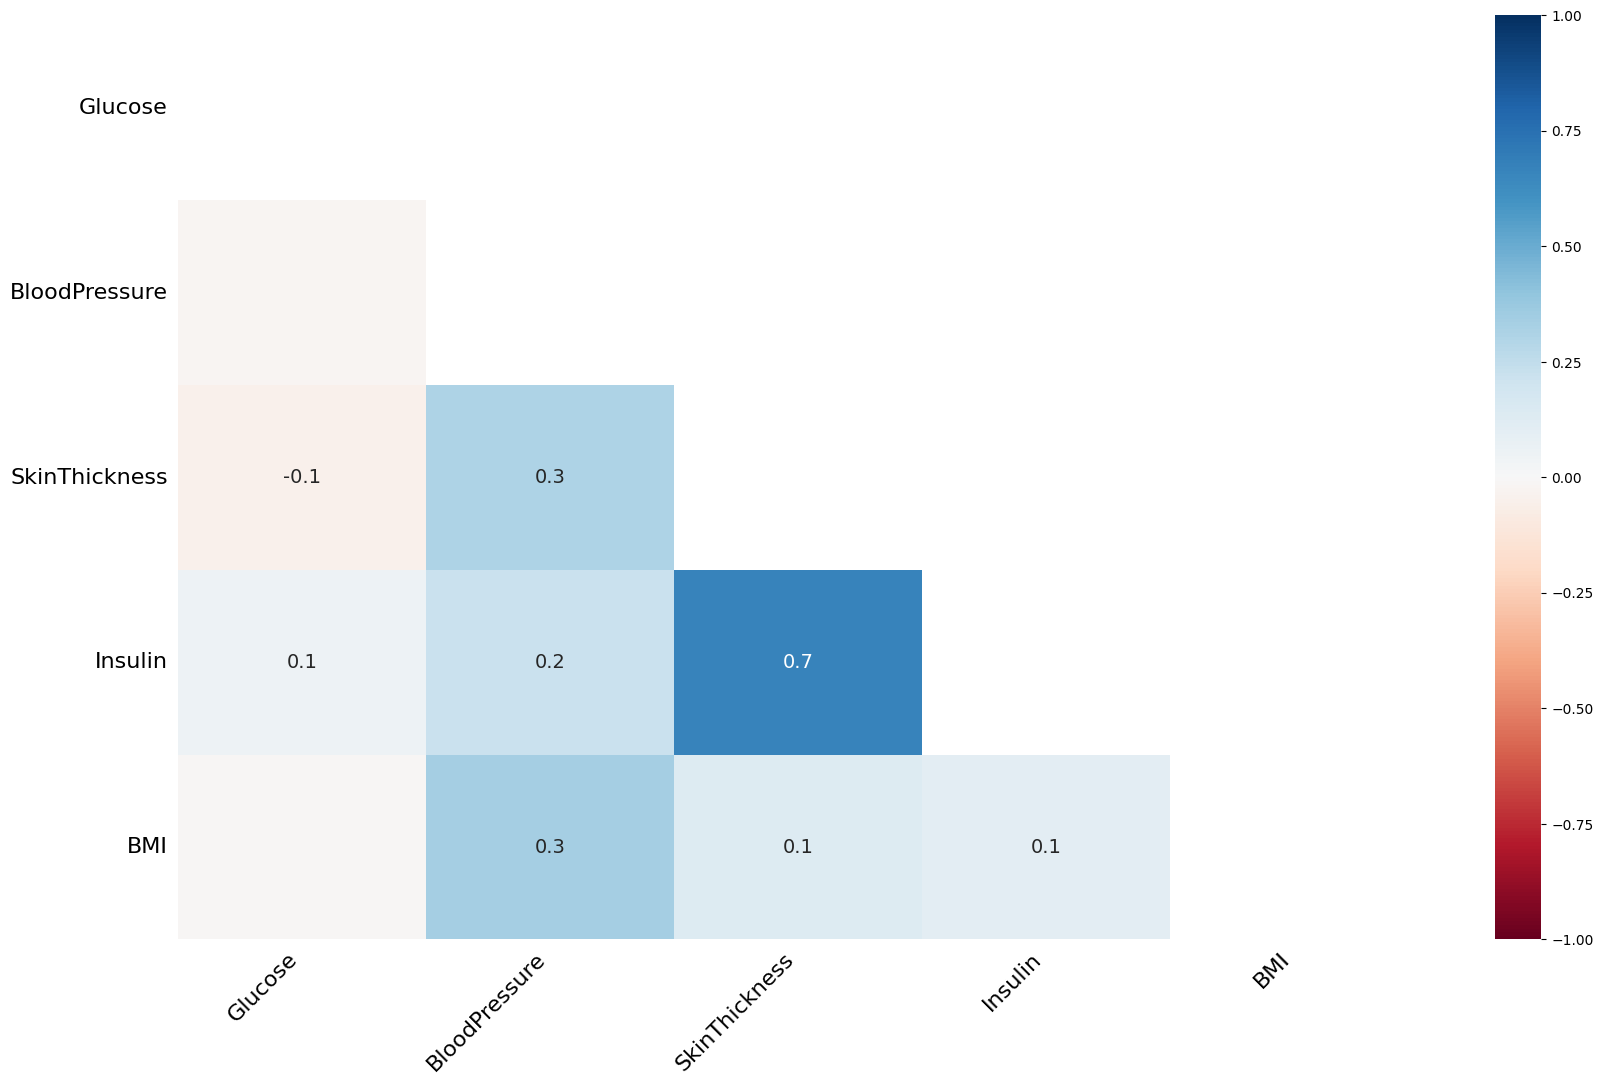

In [ ]:
msno.heatmap(df)
plt.show()

In [ ]:
def missing_values_table(dataframe, na_name=False):
    # only take missing columns
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)  # number of missing value
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])  # make table
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
missing_values_table(df)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [ ]:
# if column names wants to be stored, na_name argument can be made True
na_cols = missing_values_table(df, na_name=True)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [ ]:
na_cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Zero Value
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Yes
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,NA
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,NA
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,Yes
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,NA
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,Yes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,NA
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,Yes


In [ ]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

    print("*********** Changed DataFrame ***********")
    print(temp_df.head(10))


missing_vs_target(df, "Outcome", na_cols)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                   0.329949    394
1                   0.368984    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11


*********** Changed DataFrame ***********
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.

In [ ]:
df_cor = pd.DataFrame([df["Outcome"].corr(df[i]) for i in num_cols], index=num_cols, columns = ["Correlation"])
df_cor.sort_values(by = "Correlation", ascending = False)

,Correlation
Glucose,0.494650
BMI,0.313680
Insulin,0.303454
SkinThickness,0.259491
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
BloodPressure,0.170589


In [ ]:
df_new = df.copy() # copy dataset to see effect without damage the main dataset
df_new.shape

(768, 10)

In [ ]:
df_new.dropna(inplace=True)
df_new.shape

(392, 10)

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Zero Value
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Yes
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,NA
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,NA
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,Yes
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,NA
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,Yes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,NA
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,Yes


In [ ]:
df_fill = df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df_fill.head(10) # after filling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Zero Value
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Yes
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,NA
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,NA
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0,Yes
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,NA
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0,Yes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,NA
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1,Yes


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Zero Value
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Yes
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,NA
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,NA


In [ ]:
df_ml = df[df.columns.difference(['Has Zero Value'])]

# standardization
scaler = MinMaxScaler()
df_ml = pd.DataFrame(scaler.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness
0,0.483333,0.314928,0.489796,0.234415,0.670968,NaN,1.0,0.352941,0.304348
1,0.166667,0.171779,0.428571,0.116567,0.264516,NaN,0.0,0.058824,0.239130
2,0.183333,0.104294,0.408163,0.253629,0.896774,NaN,1.0,0.470588,NaN
3,0.000000,0.202454,0.428571,0.038002,0.290323,0.096154,0.0,0.058824,0.173913
4,0.200000,0.509202,0.163265,0.943638,0.600000,0.185096,1.0,0.000000,0.304348


In [ ]:
# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_ml = pd.DataFrame(imputer.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness
0,0.483333,0.314928,0.489796,0.234415,0.670968,0.384856,1.0,0.352941,0.304348
1,0.166667,0.171779,0.428571,0.116567,0.264516,0.050721,0.0,0.058824,0.239130
2,0.183333,0.104294,0.408163,0.253629,0.896774,0.269231,1.0,0.470588,0.273913
3,0.000000,0.202454,0.428571,0.038002,0.290323,0.096154,0.0,0.058824,0.173913
4,0.200000,0.509202,0.163265,0.943638,0.600000,0.185096,1.0,0.000000,0.304348


In [ ]:
df_ml = pd.DataFrame(scaler.inverse_transform(df_ml), columns=df_ml.columns)

In [ ]:
df_ml.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness
0,50.0,33.6,72.0,0.627,148.0,334.2,1.0,6.0,35.0
1,31.0,26.6,66.0,0.351,85.0,56.2,0.0,1.0,29.0
2,32.0,23.3,64.0,0.672,183.0,238.0,1.0,8.0,32.2
3,21.0,28.1,66.0,0.167,89.0,94.0,0.0,1.0,23.0
4,33.0,43.1,40.0,2.288,137.0,168.0,1.0,0.0,35.0


In [ ]:
# our first dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Zero Value
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Yes
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,NA
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,NA


In [ ]:
missing_values_table(df)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [ ]:
na_cols = missing_values_table(df, na_name=True) # columns that includes missing values
n_miss = df[na_cols].isnull().sum() # number of missing values on variables

# 100 as a threshold, it is open to comment
na_cols_ml = [i for i in n_miss.index if n_miss[i] < 100]
na_cols_med = [i for i in n_miss.index if n_miss[i] > 100]
print("Columns that will be applied ML model:", na_cols_ml)
print("Columns that will be filled with median:", na_cols_med)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65
Columns that will be applied ML model: ['Glucose', 'BloodPressure', 'BMI']
Columns that will be filled with median: ['SkinThickness', 'Insulin']


In [ ]:
df_apply_median_ml = df.copy()

In [ ]:
# for the number of missing value is less than 100
df_apply_median_ml[na_cols_med] = df_apply_median_ml[na_cols_med].apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df_apply_median_ml.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Zero Value
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Yes
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,NA
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,NA
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0,Yes
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,NA
7,10,115.0,NaN,29.0,125.0,35.3,0.134,29,0,Yes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,NA
9,8,125.0,96.0,29.0,125.0,NaN,0.232,54,1,Yes


In [ ]:
# standardization
scaler = MinMaxScaler()

# take only needed columns
df_apply_median_ml[na_cols_ml] = pd.DataFrame(scaler.fit_transform(df_apply_median_ml[na_cols_ml]), columns=df_apply_median_ml[na_cols_ml].columns)
print(df_apply_median_ml[na_cols_ml].head())

# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_apply_median_ml[na_cols_ml] = pd.DataFrame(imputer.fit_transform(df_apply_median_ml[na_cols_ml]), columns=df_apply_median_ml[na_cols_ml].columns)
print(df_apply_median_ml[na_cols_ml].head())

# from standardized to non-standardized
df_apply_median_ml[na_cols_ml] = pd.DataFrame(scaler.inverse_transform(df_apply_median_ml[na_cols_ml]), columns=df_apply_median_ml[na_cols_ml].columns)
print(df_apply_median_ml[na_cols_ml].head())

    Glucose  BloodPressure       BMI
0  0.670968       0.489796  0.314928
1  0.264516       0.428571  0.171779
2  0.896774       0.408163  0.104294
3  0.290323       0.428571  0.202454
4  0.600000       0.163265  0.509202
    Glucose  BloodPressure       BMI
0  0.670968       0.489796  0.314928
1  0.264516       0.428571  0.171779
2  0.896774       0.408163  0.104294
3  0.290323       0.428571  0.202454
4  0.600000       0.163265  0.509202
   Glucose  BloodPressure   BMI
0    148.0           72.0  33.6
1     85.0           66.0  26.6
2    183.0           64.0  23.3
3     89.0           66.0  28.1
4    137.0           40.0  43.1


In [ ]:
df_apply_median_ml.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has Zero Value
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Yes
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,NA
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,NA
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0,Yes
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,NA
7,10,115.0,78.2,29.0,125.0,35.3,0.134,29,0,Yes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,NA
9,8,125.0,96.0,29.0,125.0,31.1,0.232,54,1,Yes


In [ ]:
df_apply_median_ml.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
Has Zero Value,0


In [ ]:
df_ex = pd.DataFrame({"age": [17, 35, 47],
                     "pregnancy": [5, 2, 3]})
df_ex

,age,pregnancy
0,17,5
1,35,2
2,47,3


In [ ]:
df_apply_median_ml = df_apply_median_ml[df.columns.difference(['Has Zero Value'])]

In [ ]:
# LOF
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df_apply_median_ml)  # returns LOF scores
df_scores = clf.negative_outlier_factor_ # keep scores to observe (negative)
# df_scores = -df_scores # for changing to pozitive but we will use as negative
print(df_scores[0:5])
print(np.sort(df_scores)[0:5])

[-1.01906445 -0.99569451 -1.0618044  -0.99166551 -1.27903361]
[-2.80654993 -2.59693313 -2.4153327  -2.02605837 -1.99003552]


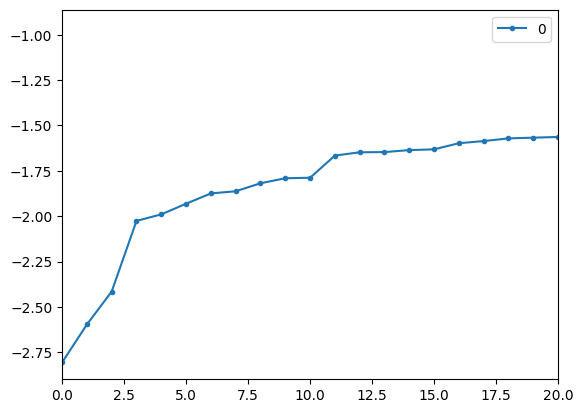

In [ ]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

In [ ]:
th = np.sort(df_scores)[3]  # set any lower scores than that as outlier
df_apply_median_ml[df_scores < th] # check outliers

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness
13,59,30.1,60.0,0.398,189.0,846.0,1,1,23.0
445,25,59.4,78.0,2.420,180.0,14.0,1,0,63.0
579,62,34.7,70.0,0.575,197.0,125.0,1,2,99.0


In [ ]:
df_apply_median_ml.describe([0.01, 0.05, 0.25, 0.50, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,99%,max
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,24.00000,29.0000,41.00000,51.0000,67.00000,81.00
BMI,768.0,32.460625,6.883303,18.200,19.50000,22.23500,27.50000,32.3000,36.60000,41.5000,50.75900,67.10
BloodPressure,768.0,72.415625,12.201954,24.000,44.00000,52.00000,64.00000,72.0000,80.00000,88.0000,106.00000,122.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.14035,0.24375,0.3725,0.62625,0.8786,1.69833,2.42
Glucose,768.0,121.680208,30.444131,44.000,67.67000,80.00000,99.75000,117.0000,140.25000,167.0000,196.00000,199.00
Insulin,768.0,140.671875,86.383060,14.000,24.34000,50.00000,121.50000,125.0000,127.25000,210.0000,519.90000,846.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,1.00000,3.0000,6.00000,9.0000,13.00000,17.00
SkinThickness,768.0,29.108073,8.791221,7.000,10.00000,14.35000,25.00000,29.0000,32.00000,40.0000,51.33000,99.00


In [ ]:
print("Before delete outliers:", df.shape)
print(df[df_scores < th].index) # indexes of outliers, just for observation
df.drop(axis=0, labels=df[df_scores < th].index, inplace=True)
print("After delete outliers:", df.shape)

Before delete outliers: (768, 10)
Index([13, 445, 579], dtype='int64')
After delete outliers: (765, 10)


In [ ]:
# create categorical columns from numerical columns

# if bins are 0, 3, 6 => 0 values become NaN due to bins
df_apply_median_ml["NumOfPreg"] = pd.cut(df_apply_median_ml["Pregnancies"], bins=[-1, 3, 6, df["Pregnancies"].max()], labels=["Normal", "Above Normal","Extreme"])
df_apply_median_ml["AgeGroup"] = pd.cut(df_apply_median_ml["Age"], bins=[18, 25, 40, df["Age"].max()], labels=["Young", "Mature", "Old"])
df_apply_median_ml["GlucoseGroup"] = pd.qcut(df_apply_median_ml["Glucose"], 3, labels=["Low", "Medium", "High"])
df_apply_median_ml["Patient"] = np.where(df_apply_median_ml["Outcome"] == 1, "Yes", "No")

In [ ]:
# example of mathematical expression

"""Assume there is a variable named "BMIns", and it can be found with the multiplication of BMI and Insuline.
Create and add it to data frame"""

df_apply_median_ml["BMIns"] = df_apply_median_ml["BMI"]*df_apply_median_ml["Insulin"] # numerical
df_apply_median_ml["BMInsGroup"] = pd.qcut(df_apply_median_ml["BMIns"], 3, labels=["Low", "Medium", "High"]) # categorical

In [ ]:
df_apply_median_ml.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,NumOfPreg,AgeGroup,GlucoseGroup,Patient,BMIns,BMInsGroup
0,50,33.6,72.0,0.627,148.0,125.0,1,6,35.0,Above Normal,Old,High,Yes,4200.0,Medium
1,31,26.6,66.0,0.351,85.0,125.0,0,1,29.0,Normal,Mature,Low,No,3325.0,Low
2,32,23.3,64.0,0.672,183.0,125.0,1,8,29.0,Extreme,Mature,High,Yes,2912.5,Low
3,21,28.1,66.0,0.167,89.0,94.0,0,1,23.0,Normal,Young,Low,No,2641.4,Low
4,33,43.1,40.0,2.288,137.0,168.0,1,0,35.0,Normal,Mature,High,Yes,7240.8,High


In [ ]:
df_enc = df_apply_median_ml.copy()

le = LabelEncoder()
le.fit_transform(df_enc["Patient"])[0:5]

array([1, 0, 1, 0, 1])

In [ ]:
# let's say we forgot which 0 and which 1, inverse_transform is used to detect this
le.inverse_transform([0, 1])

array(['No', 'Yes'], dtype=object)

In [ ]:
# detect variables that have 2 unique numbers for Binary Encoding
binary_cols = [col for col in df_apply_median_ml.columns if df_apply_median_ml[col].dtype not in [int, float]
               and df_apply_median_ml[col].nunique() == 2]

In [ ]:
binary_cols

['Patient']

In [ ]:
df_new = pd.get_dummies(df_apply_median_ml, columns=["Patient"])
df_new.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,NumOfPreg,AgeGroup,GlucoseGroup,BMIns,BMInsGroup,Patient_No,Patient_Yes
0,50,33.6,72.0,0.627,148.0,125.0,1,6,35.0,Above Normal,Old,High,4200.0,Medium,False,True
1,31,26.6,66.0,0.351,85.0,125.0,0,1,29.0,Normal,Mature,Low,3325.0,Low,True,False
2,32,23.3,64.0,0.672,183.0,125.0,1,8,29.0,Extreme,Mature,High,2912.5,Low,False,True
3,21,28.1,66.0,0.167,89.0,94.0,0,1,23.0,Normal,Young,Low,2641.4,Low,True,False
4,33,43.1,40.0,2.288,137.0,168.0,1,0,35.0,Normal,Mature,High,7240.8,High,False,True


In [ ]:
df_new = pd.get_dummies(df_apply_median_ml, columns=["Patient"], drop_first=True)
df_new.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,NumOfPreg,AgeGroup,GlucoseGroup,BMIns,BMInsGroup,Patient_Yes
0,50,33.6,72.0,0.627,148.0,125.0,1,6,35.0,Above Normal,Old,High,4200.0,Medium,True
1,31,26.6,66.0,0.351,85.0,125.0,0,1,29.0,Normal,Mature,Low,3325.0,Low,False
2,32,23.3,64.0,0.672,183.0,125.0,1,8,29.0,Extreme,Mature,High,2912.5,Low,True
3,21,28.1,66.0,0.167,89.0,94.0,0,1,23.0,Normal,Young,Low,2641.4,Low,False
4,33,43.1,40.0,2.288,137.0,168.0,1,0,35.0,Normal,Mature,High,7240.8,High,True


In [ ]:
df_new = pd.get_dummies(df_apply_median_ml, columns=["Patient"], drop_first=True, prefix=["Sick"])
df_new.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,NumOfPreg,AgeGroup,GlucoseGroup,BMIns,BMInsGroup,Sick_Yes
0,50,33.6,72.0,0.627,148.0,125.0,1,6,35.0,Above Normal,Old,High,4200.0,Medium,True
1,31,26.6,66.0,0.351,85.0,125.0,0,1,29.0,Normal,Mature,Low,3325.0,Low,False
2,32,23.3,64.0,0.672,183.0,125.0,1,8,29.0,Extreme,Mature,High,2912.5,Low,True
3,21,28.1,66.0,0.167,89.0,94.0,0,1,23.0,Normal,Young,Low,2641.4,Low,False
4,33,43.1,40.0,2.288,137.0,168.0,1,0,35.0,Normal,Mature,High,7240.8,High,True


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_apply_median_ml)
cat_cols

# Initial Categorical Columns (object type): 1
# Categorical-looking Numerical Columns (< 10 unique values, not object type): 5
# Cardinal Columns (> 20 unique values, object type): 0
# Final Numerical Columns (not object type, excluding identified categorical): 9

Observations: 768
Variables: 15
cat_cols: 6
num_cols: 9
cat_but_car: 0
num_but_cat: 5


['Patient', 'Outcome', 'NumOfPreg', 'AgeGroup', 'GlucoseGroup', 'BMInsGroup']

In [ ]:
cat_cols_final = [i for i in cat_cols if i not in ["Patient", "Outcome"]]
df_cat_modified = pd.get_dummies(df_apply_median_ml, columns=cat_cols_final, drop_first=True)
df_cat_modified.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,Patient,BMIns,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseGroup_Medium,GlucoseGroup_High,BMInsGroup_Medium,BMInsGroup_High
0,50,33.6,72.0,0.627,148.0,125.0,1,6,35.0,Yes,4200.0,True,False,False,True,False,True,True,False
1,31,26.6,66.0,0.351,85.0,125.0,0,1,29.0,No,3325.0,False,False,True,False,False,False,False,False
2,32,23.3,64.0,0.672,183.0,125.0,1,8,29.0,Yes,2912.5,False,True,True,False,False,True,False,False
3,21,28.1,66.0,0.167,89.0,94.0,0,1,23.0,No,2641.4,False,False,False,False,False,False,False,False
4,33,43.1,40.0,2.288,137.0,168.0,1,0,35.0,Yes,7240.8,False,False,True,False,False,True,False,True


In [ ]:
df_cat_modified.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,Patient,BMIns,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseGroup_Medium,GlucoseGroup_High,BMInsGroup_Medium,BMInsGroup_High
0,50,33.6,72.0,0.627,148.0,125.0,1,6,35.0,Yes,4200.0,True,False,False,True,False,True,True,False
1,31,26.6,66.0,0.351,85.0,125.0,0,1,29.0,No,3325.0,False,False,True,False,False,False,False,False
2,32,23.3,64.0,0.672,183.0,125.0,1,8,29.0,Yes,2912.5,False,True,True,False,False,True,False,False
3,21,28.1,66.0,0.167,89.0,94.0,0,1,23.0,No,2641.4,False,False,False,False,False,False,False,False
4,33,43.1,40.0,2.288,137.0,168.0,1,0,35.0,Yes,7240.8,False,False,True,False,False,True,False,True


In [ ]:
df_scale = df_cat_modified.copy()

# standart scaler
ss = StandardScaler()
df_scale["Age_standard_scaler"] = ss.fit_transform(df_scale[["Age"]])
df_scale.head()


,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,Patient,BMIns,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseGroup_Medium,GlucoseGroup_High,BMInsGroup_Medium,BMInsGroup_High,Age_standard_scaler
0,50,33.6,72.0,0.627,148.0,125.0,1,6,35.0,Yes,4200.0,True,False,False,True,False,True,True,False,1.425995
1,31,26.6,66.0,0.351,85.0,125.0,0,1,29.0,No,3325.0,False,False,True,False,False,False,False,False,-0.190672
2,32,23.3,64.0,0.672,183.0,125.0,1,8,29.0,Yes,2912.5,False,True,True,False,False,True,False,False,-0.105584
3,21,28.1,66.0,0.167,89.0,94.0,0,1,23.0,No,2641.4,False,False,False,False,False,False,False,False,-1.041549
4,33,43.1,40.0,2.288,137.0,168.0,1,0,35.0,Yes,7240.8,False,False,True,False,False,True,False,True,-0.020496


In [ ]:
# robust scaler
rs = RobustScaler()
df_scale["Age_robuts_scaler"] = rs.fit_transform(df_scale[["Age"]])
df_scale.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,Patient,...,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseGroup_Medium,GlucoseGroup_High,BMInsGroup_Medium,BMInsGroup_High,Age_standard_scaler,Age_robuts_scaler
0,50,33.6,72.0,0.627,148.0,125.0,1,6,35.0,Yes,...,True,False,False,True,False,True,True,False,1.425995,1.235294
1,31,26.6,66.0,0.351,85.0,125.0,0,1,29.0,No,...,False,False,True,False,False,False,False,False,-0.190672,0.117647
2,32,23.3,64.0,0.672,183.0,125.0,1,8,29.0,Yes,...,False,True,True,False,False,True,False,False,-0.105584,0.176471
3,21,28.1,66.0,0.167,89.0,94.0,0,1,23.0,No,...,False,False,False,False,False,False,False,False,-1.041549,-0.470588
4,33,43.1,40.0,2.288,137.0,168.0,1,0,35.0,Yes,...,False,False,True,False,False,True,False,True,-0.020496,0.235294


In [ ]:
# min-max scaler
# The range can be given with the feature_range=() argument
mms = MinMaxScaler() # default range from 0 to 1
df_scale["Age_min_max_scaler"] = mms.fit_transform(df_scale[["Age"]])

df_scale.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,Patient,...,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseGroup_Medium,GlucoseGroup_High,BMInsGroup_Medium,BMInsGroup_High,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,50,33.6,72.0,0.627,148.0,125.0,1,6,35.0,Yes,...,False,False,True,False,True,True,False,1.425995,1.235294,0.483333
1,31,26.6,66.0,0.351,85.0,125.0,0,1,29.0,No,...,False,True,False,False,False,False,False,-0.190672,0.117647,0.166667
2,32,23.3,64.0,0.672,183.0,125.0,1,8,29.0,Yes,...,True,True,False,False,True,False,False,-0.105584,0.176471,0.183333
3,21,28.1,66.0,0.167,89.0,94.0,0,1,23.0,No,...,False,False,False,False,False,False,False,-1.041549,-0.470588,0.000000
4,33,43.1,40.0,2.288,137.0,168.0,1,0,35.0,Yes,...,False,True,False,False,True,False,True,-0.020496,0.235294,0.200000


In [ ]:
rs = RobustScaler()
for i in num_cols:
    df_cat_modified[i] = rs.fit_transform(df_cat_modified[[i]])
df_cat_modified.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness,Patient,BMIns,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseGroup_Medium,GlucoseGroup_High,BMInsGroup_Medium,BMInsGroup_High
0,1.235294,0.142857,0.000,0.665359,0.765432,0.000000,1,0.6,0.857143,Yes,0.109721,True,False,False,True,False,True,True,False
1,0.117647,-0.626374,-0.375,-0.056209,-0.790123,0.000000,0,-0.4,0.000000,No,-0.328162,False,False,True,False,False,False,False,False
2,0.176471,-0.989011,-0.500,0.783007,1.629630,0.000000,1,1.0,0.000000,Yes,-0.534593,False,True,True,False,False,True,False,False
3,-0.470588,-0.461538,-0.375,-0.537255,-0.691358,-5.391304,0,-0.4,-0.857143,No,-0.670261,False,False,False,False,False,False,False,False
4,0.235294,1.186813,-2.000,5.007843,0.493827,7.478261,1,-0.6,0.857143,Yes,1.631453,False,False,True,False,False,True,False,True


In [ ]:
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7857142857142857

In [ ]:
X_test.columns

Index(['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose',
       'Insulin', 'Pregnancies', 'SkinThickness', 'NumOfPreg_Above Normal',
       'NumOfPreg_Extreme', 'AgeGroup_Mature', 'AgeGroup_Old',
       'GlucoseGroup_Medium', 'GlucoseGroup_High'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Splitting the data
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Using KNeighborsClassifier instead of RandomForestClassifier
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6948


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Splitting the data
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Using LinearSVC instead of RandomForestClassifier

svm_model = LinearSVC(random_state=46).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7922


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting the data
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Using SVC with RBF kernel instead of RandomForestClassifier
rbf_svm_model = SVC(kernel='rbf', random_state=46).fit(X_train, y_train)
y_pred = rbf_svm_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7403


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score

# Splitting the data
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Using GaussianProcessClassifier instead of RandomForestClassifier
gp_model = GaussianProcessClassifier(random_state=46).fit(X_train, y_train)
y_pred = gp_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7403


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting the data
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Using DecisionTreeClassifier instead of RandomForestClassifier
dt_model = DecisionTreeClassifier(random_state=46).fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7143


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Splitting the data
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Using MLPClassifier (Neural Net) instead of RandomForestClassifier
nn_model = MLPClassifier(random_state=46).fit(X_train, y_train)
y_pred = nn_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7792


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Splitting the data
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Using AdaBoostClassifier instead of RandomForestClassifier
ab_model = AdaBoostClassifier(random_state=46).fit(X_train, y_train)
y_pred = ab_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7468


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Splitting the data
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Using GaussianNB instead of RandomForestClassifier
nb_model = GaussianNB().fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7532


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Splitting the data
y = df_cat_modified["Outcome"]
X = df_cat_modified.drop(["Outcome", "Patient", "BMIns", "BMInsGroup_Medium", "BMInsGroup_High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Using QuadraticDiscriminantAnalysis instead of RandomForestClassifier
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred = qda_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7792
